### Pengenalan Dataset

In [1]:
#import library pandas
import pandas as pd

In [2]:
#import data
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [3]:
#Untuk Mengetahui Ukuran Dataset : ((nama_data).shape)
print('Ukuran dataset: %d baris dan %d kolom \n' %dataset.shape)

print('Lima data teratas : ')
#Untuk Melihat 5 Data Teratas
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom 

Lima data teratas : 
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


### Penambahan Kolom Order Month pada Dataset

In [4]:
#import library datetime (manipulating dates and times.)
import datetime

In [5]:
#Membuat Kolom Order Month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

#Membaca 5 Data Teratas
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


### Penambahan Kolom GMV pada Dataset

In [6]:
#Membuat kolom GMV; Isi kolom GMW yaitu data dari kolom item_price dikali kolom quantity
dataset['gmv'] = dataset['item_price']*dataset['quantity']

In [7]:
#Untuk Mengetahui Ukuran Dataset : ((nama_data).shape)
print('Ukuran dataset: %d baris dan %d kolom \n' %dataset.shape)

print('Lima data teratas : ')
#Untuk Melihat 5 Data Teratas
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom 

Lima data teratas : 
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


### Quiz

In [8]:
#Membuat kolom bernama 2*item_price; Isi kolom bernama 2*item_price yaitu 2*(nilai kolom item_price)
dataset['2*item_price'] = dataset['item_price'].apply(lambda x: x*2)

In [9]:
print('Lima data teratas : ')
#Untuk Melihat 5 Data Teratas
print(dataset.head())

Lima data teratas : 
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  2*item_price  
0  BRAND_J        10      740000     2019-10  7400000       1480000  
1  BRAND_R         2      604000     2019-10  1208000       1208000  
2  BRAND_C         8     1045000     2019-11  8360000       2090000  
3  BRAND_A         4      205000     2019-08   820000        410000  
4  BRAND_R         2     4475000     2019-10  8950000       8950000  


### Membuat Data Agregat

In [10]:
#Membuat Data Agregat bernama (monthly_amount)
#reset_index() untuk mereset angka index jadi 0 lagi
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()

In [11]:
#men-print Data Agregat bernama (monthly_amount)
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


### Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV

In [12]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
#as digunakan untuk membuat istilah.
import matplotlib.pyplot as plt

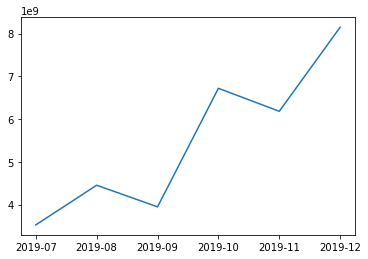

In [13]:
#plt.plot(Sumbu X, Sumbu Y)
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])

#Print Output Grafik atau Figure
plt.show()

### Cara Alternatif: Fungsi .plot() pada pandas Dataframe

In [14]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
#as digunakan untuk membuat istilah.
import matplotlib.pyplot as plt

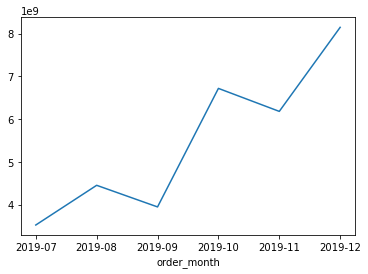

In [15]:
#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot()
dataset.groupby(['order_month'])['gmv'].sum().plot()

#Print Output Grafik atau Figure
plt.show()

### Mengubah Figure Size

In [16]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
#as digunakan untuk membuat istilah.
import matplotlib.pyplot as plt

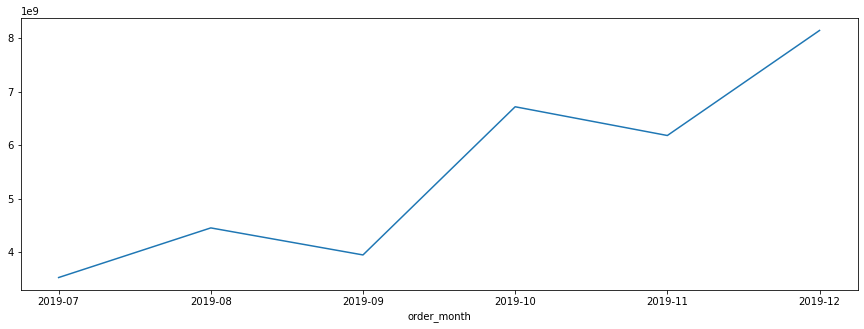

In [17]:
#Kustomisasi Ukuran Figure / Chart
plt.figure(figsize=(15,5))

#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot()
dataset.groupby(['order_month'])['gmv'].sum().plot()

#Print Output Grafik atau Figure
plt.show()

### Menambahkan Title and Axis Labels

In [18]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
import matplotlib.pyplot as plt

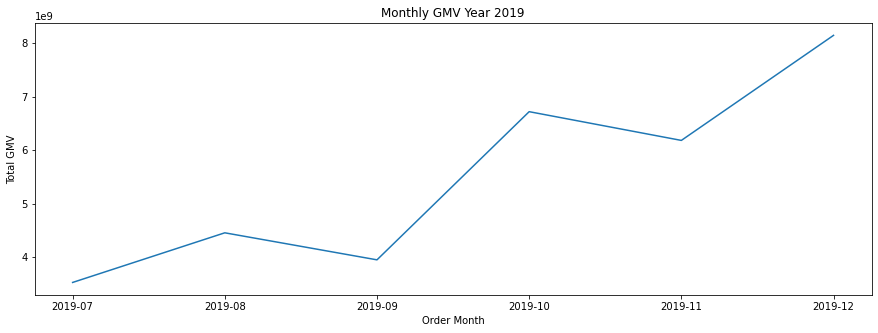

In [19]:
#Kustomisasi Ukuran Figure / Chart
plt.figure(figsize=(15, 5))

#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot()
dataset.groupby(['order_month'])['gmv'].sum().plot()

#Pemberian judul untuk Grafik atau Figure
plt.title('Monthly GMV Year 2019')

#Pemberian nama untuk label sumbu x
plt.xlabel('Order Month')

#Pemberian nama untuk Label sumbu y
plt.ylabel('Total GMV')

#Print Output Grafik atau Figure
plt.show()

### Kustomisasi Title dan Axis Labels

In [20]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
import matplotlib.pyplot as plt

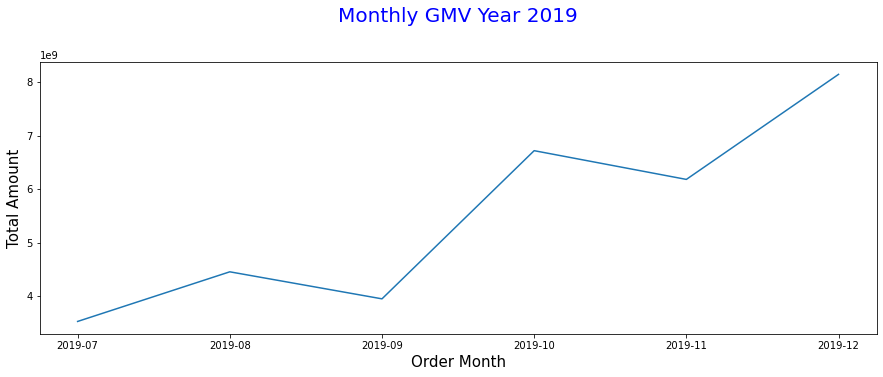

In [21]:
#Kustomisasi Ukuran Figure / Chart
plt.figure(figsize=(15, 5))

#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot()
dataset.groupby(['order_month'])['gmv'].sum().plot()

#Pemberian judul untuk Grafik atau Figure dan Kustomisasi Title
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')

#Kustomisasi Axis untuk Sumbu X dan Sumbu Y
#Pemberian nama untuk label sumbu x
plt.xlabel('Order Month', fontsize=15)

#Pemberian nama untuk Label sumbu y
plt.ylabel('Total Amount', fontsize=15)

#Print Output Grafik atau Figure
plt.show()

### Kustomisasi Line dan Point

In [22]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
import matplotlib.pyplot as plt

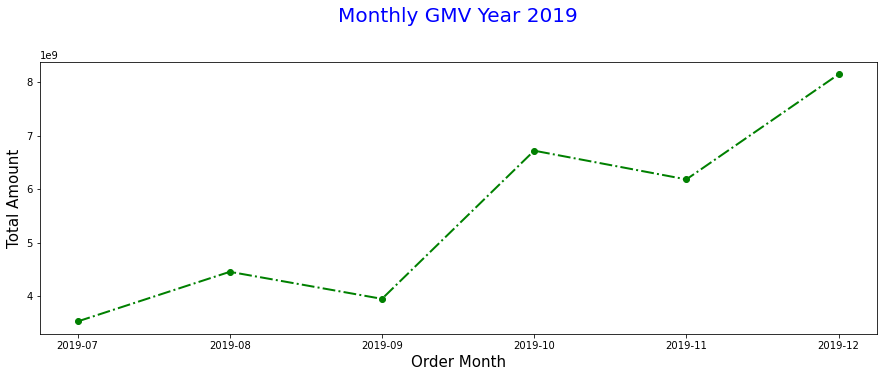

In [23]:
#Kustomisasi Ukuran Figure / Chart
plt.figure(figsize=(15, 5))

#Kustomisasi Line dan Point
#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot((Kustomisasi disini))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

#Judul Grafik
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15) #keterangan sumbu x
plt.ylabel('Total Amount', fontsize=15) #keterangan sumbu y

plt.show() #Print figure/chart

### Kustomisasi Grid

In [24]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
import matplotlib.pyplot as plt

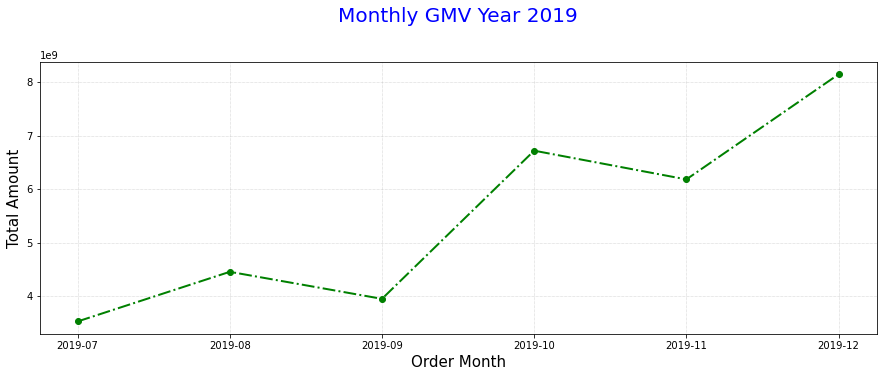

In [25]:
plt.figure(figsize=(15, 5)) #ukuran chart atau figure

#Kustomisasi Line dan Point
#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot((Kustomisasi disini))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

#Judul chart atau figure beserta kustomisasinya.
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15) #Keterangan Sumbu X dan Kustomisasinya
plt.ylabel('Total Amount', fontsize=15) #Keterangan Sumbu Y dan Kustomisasinya

#Kustomisasi Grid
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

### Kustomisasi Axis Ticks

In [26]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
import matplotlib.pyplot as plt

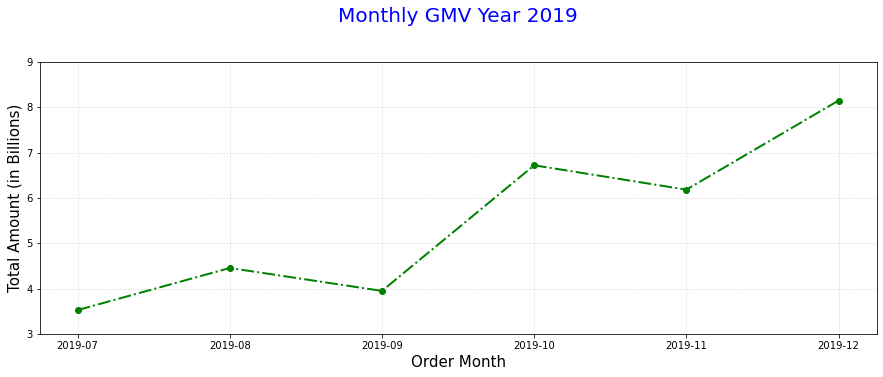

In [27]:
plt.figure(figsize=(15, 5)) #ukuran chart atau figure

#Kustomisasi Line dan Point
#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot((Kustomisasi disini))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

#Judul chart atau figure beserta kustomisasinya.
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue') 
plt.xlabel('Order Month', fontsize=15)#Keterangan Sumbu x dan Kustomisasinya
plt.ylabel('Total Amount (in Billions)', fontsize=15)#Keterangan Sumbu Y dan Kustomisasinya

plt.grid(color='darkgray', linestyle=':', linewidth=0.5) #Kustomisasi Grid pada Figure / Chart

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

plt.show()

### Menentukan Batas Minimum dan Maksimum Axis Ticks

In [28]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
import matplotlib.pyplot as plt

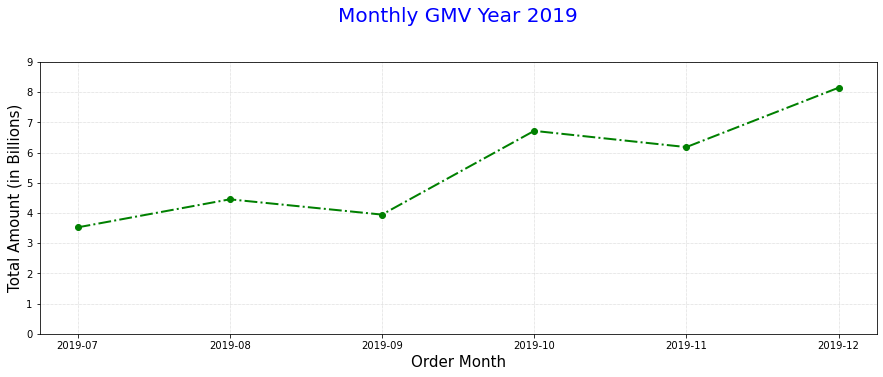

In [29]:
plt.figure(figsize=(15, 5)) #ukuran chart atau figure

#Kustomisasi Line dan Point
#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot((Kustomisasi disini))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

#Judul chart atau figure beserta kustomisasinya.
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue') 
plt.xlabel('Order Month', fontsize=15)#Keterangan Sumbu x dan Kustomisasinya
plt.ylabel('Total Amount (in Billions)', fontsize=15)#Keterangan Sumbu Y dan Kustomisasinya

plt.grid(color='darkgray', linestyle=':', linewidth=0.5) #Kustomisasi Grid pada Figure / Chart

plt.ylim(ymin=0) #Menentukan Batas Minimum dan Maksimum Axis Ticks

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

plt.show()

### Menambahkan Informasi Pada Plot

In [30]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
import matplotlib.pyplot as plt

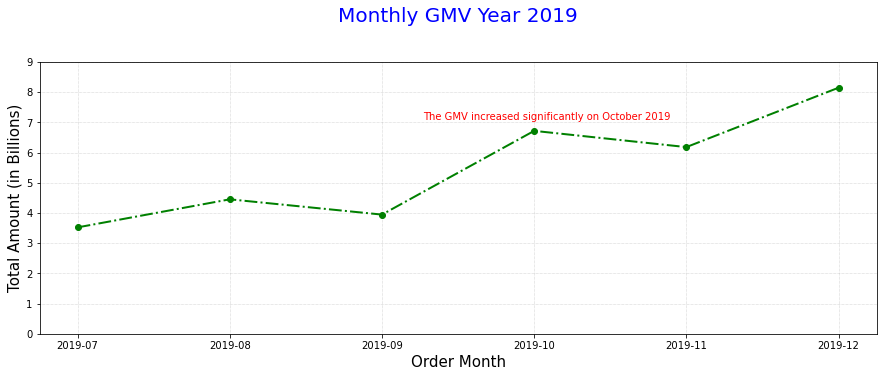

In [31]:
fig = plt.figure(figsize=(15, 5)) #ukuran chart atau figure, dimasukan kedalam variable (fig)

#Kustomisasi Line dan Point
#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot((Kustomisasi disini))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

#Judul chart atau figure beserta kustomisasinya.
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue') 
plt.xlabel('Order Month', fontsize=15)#Keterangan Sumbu x dan Kustomisasinya
plt.ylabel('Total Amount (in Billions)', fontsize=15)#Keterangan Sumbu Y dan Kustomisasinya

plt.grid(color='darkgray', linestyle=':', linewidth=0.5) #Kustomisasi Grid pada Figure / Chart

plt.ylim(ymin=0) #Menentukan Batas Minimum dan Maksimum Axis Ticks

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#Menambahkan Informasi Pada Plot
plt.text(0.48,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')

plt.show()

### Menyimpan Hasil Plot Menjadi File Image

In [32]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
import matplotlib.pyplot as plt

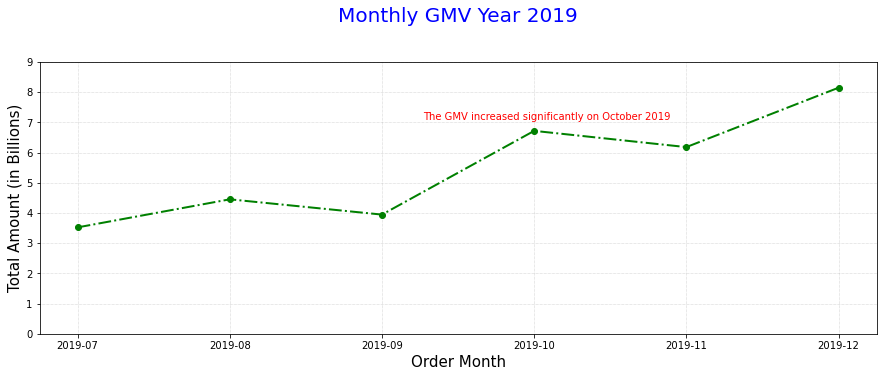

In [33]:
fig = plt.figure(figsize=(15, 5)) #ukuran chart atau figure, dimasukan kedalam variable (fig)

#Kustomisasi Line dan Point
#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot((Kustomisasi disini))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

#Judul chart atau figure beserta kustomisasinya.
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue') 
plt.xlabel('Order Month', fontsize=15)#Keterangan Sumbu x dan Kustomisasinya
plt.ylabel('Total Amount (in Billions)', fontsize=15)#Keterangan Sumbu Y dan Kustomisasinya

plt.grid(color='darkgray', linestyle=':', linewidth=0.5) #Kustomisasi Grid pada Figure / Chart

plt.ylim(ymin=0) #Menentukan Batas Minimum dan Maksimum Axis Ticks

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#Menambahkan Informasi Pada Plot
plt.text(0.48,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')

#Menyimpan Hasil Plot Menjadi File Image
plt.savefig('monthly_gmv.png')

plt.show()

### Pengaturan Parameter untuk Menyimpan Gambar

In [34]:
#Memanggil function matplotlib.pyplot untuk buat grafik / figure.
import matplotlib.pyplot as plt

<ipython-input-35-3e43450b6b65>:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('monthly_gmv.png', quality=95)


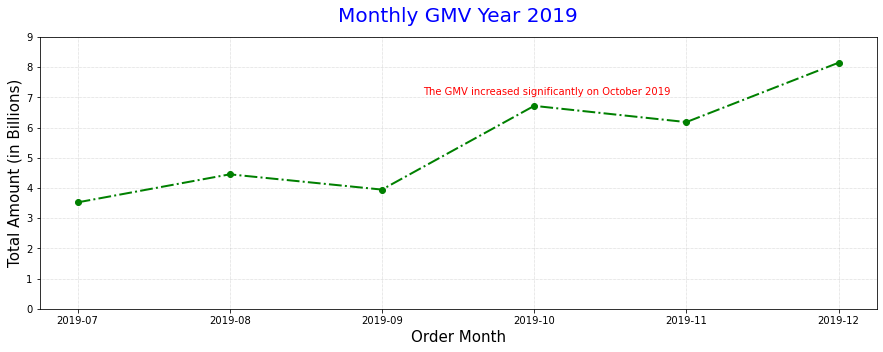

In [35]:
fig = plt.figure(figsize=(15, 5)) #ukuran chart atau figure, dimasukan kedalam variable (fig)

#Kustomisasi Line dan Point
#dataset.groupby([Sumbu X])[Sumbu Y].sum().plot((Kustomisasi disini))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

#Judul chart atau figure beserta kustomisasinya.
plt.title('Monthly GMV Year 2019', loc='center', pad=15, fontsize=20, color='blue') 
plt.xlabel('Order Month', fontsize=15)#Keterangan Sumbu x dan Kustomisasinya
plt.ylabel('Total Amount (in Billions)', fontsize=15)#Keterangan Sumbu Y dan Kustomisasinya

plt.grid(color='darkgray', linestyle=':', linewidth=0.5) #Kustomisasi Grid pada Figure / Chart

plt.ylim(ymin=0) #Menentukan Batas Minimum dan Maksimum Axis Ticks

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#Menambahkan Informasi Pada Plot
plt.text(0.48,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')

#Menyimpan Hasil Plot Menjadi File Image
plt.savefig('monthly_gmv.png', quality=95)

plt.show()

## Mini Quiz

### Import Library yang dibutuhkan

In [37]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

### Input data yang dibutuhkan

In [41]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

### Buat kolom order_month

In [46]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

### Buat kolom GMV

In [68]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

### Plot Grafik (Line Chart)

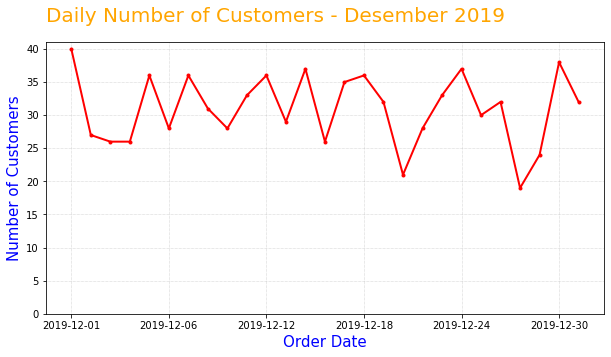

In [67]:
#Kustomisasi Ukuran Figure
plt.figure(figsize=(10, 5))

#Menentukan Data Mana yang ingin dibuat figure
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.',linewidth=2)

#Membuat Judul dari plot atau figure
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='orange')

#Membuat label sebagai keterangan sumbu x
plt.xlabel('Order Date', fontsize=15, color='blue')

#Membuat label sebagai keterangan sumbu y
plt.ylabel('Number of Customers', fontsize=15, color='blue')

#Membuat Grid untuk Figurenya
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

#Menentukan angka minimum pada sumbu Y 
plt.ylim(ymin=0)

plt.show()